<h1 align="center">Random Forest</h1>

# Content
***
- A person by the name Lucius' visits New York (short story)
    in search of a **loan for a house**.
- Shortcommings of Decision trees
- Introducing Random Forests
- Hyperparameters for Random Forests
- Lucius' Optimal Parameters & Model Fitting 
- Predicting Lucius Loan Outcome 
*****

## Lucius & New York
***
- After spending a few days at John's in Brooklyn, Lucius was going to the Grand Central Railway Station to head back home 

- He was in a cab and as usual, it was taking a lot time traveling from Brooklyn to Grand Central

- In the cab, he realized that his cab can take multiple routes to the SAME destination


<center><img src="../images/rf1.png" alt="Drawing" style="width: 400px;"/></center>

## Lucius & New York
***
 - He pondered upon this a lot while he was on the train, returning home 
 
 - He thought that what if he could use multiple Decision Trees to help in out in his model? 
 
 - He doesn't HAVE to pick the best one (like how Google Maps picks the best route) 
 
 - He could use the average of all predictions
 
 - Intuitively, this does seem like a good approach. More models will give a more robust prediction

## Lucius' Approach 
***
- He thought to use multiple trees as using just 1 tree limits his predictions to constrained by the specified hyper-parameters 

- Thus, the Decision Tree by itself did lack a few important characteristics

- Let's see what they were and understand what Lucius was trying to achieve 


## Revisiting Decision Trees 
***
- Shortcomings of decision trees
    - They overfit
    - They are structurally unstable since we need to find the optimal hyper-parameters in order to interpret the result
    
    
- Therefore, by using a greater number of Trees a.k.a a "Forest", Lucius thought that this is 1 way of getting a better fitting model and prediction

## Bagging & Random Forest 

***
- **Bagging** :

- Boostrap Aggregation is called **Bagging**


- It's Ensemble Meta-Algorithm


- Used for improving the stability and accuray of ML algorithms 


- It can be used in both **Regression & Classification** techniques 


## Bagging & Random Forest 

- In bagging, a random subset of the training data is selected to train each tree


- Furthermore, the model randomly restricts the variables which may be used at the splits of each tree. Hence, the trees grown are dissimilar, but they still retain certain predictive power.


- Let's build our intuition through an easy example and then return back to Lucius' Approach

## Example - People's first preference of Entertainment
***
 - A random sample of people were given 3 options when asked what their preferred mode of entertainment were. These options were :


 1. Watching TV/Movies Online and at home (Netflix, etc) 
 2. Going to the Movie Theaters 
 3. Watching a live Play 

## Entertainment
***
The information (variables) available in the dataset for each individual is the following:

1. Age 
2. Gender
3. Highest educational qualification
4. Working in Industry 
5. Residence in Metro/Non-metro

We need to come up with an algorithm to give an accurate prediction for an individual who has following traits:

1. Age : 35 years 
2. Gender : Male 
3. Highest Educational Qualification : Diploma holder
4. Industry : Manufacturing
5. Residence : Metro

We will only talk about random forest to make this prediction in our example

#### How the RF Algorithm works
 - Say, we have a random 1000 observations of Mexicans with 10 variables
 
 - Random forest tries to build multiple Decision Trees models with different samples and different initial variables. 
 
 - For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model 
 
 - It will repeat the process (say) 10 times and then make a final prediction on each observation
 
 - **Final prediction is a function of each prediction. This final prediction can simply be the mean or mode of each prediction**

## Back to Entertainment
*** 
 - Say, the algorithm Random forest picks up 10,000 observations with only one variable (for simplicity) to build each Decision Tree model. In total, we are looking at 5 Decision Tree models being built with different variables.

- Remember: we have 5 variables in this dataset as described in the previous slides


- In a real life problem, you will have more population sample and different combinations of  input variables. Let's have a look at the feature bands again:

## Back to Entertainment
***
 Salary bands :

 Band 1) Watching TV/Movies Online and at home (Netflix, etc) 
 
 Band 2) Going to the Movie Theaters 
 
 Band 3) Watching a live Play 

Following are the outputs of the 5 different CART models

## Entertainment, Entertainment, Entertainment ;)
***
#### Note: These are outputs from the dataset and have been arranged in Tabular format for easy comprehension

**CART 1: VARIABLE AGE**
***
<center><img src="../images/rf3.png" alt="Drawng" style="width: 400px;"/></center>

**CART 2: Variable Gender**
***
<center><img src="../images/rf4.png" alt="Drawing" style="width: 400px;"/></center>

**CART 3: Variable Education**
***
<center><img src="../images/rf5.png" alt="Drawing" style="width: 400px;"/></center>

**CART 4: Variable Residence**
***
<center><img src="../images/rf6.png" alt="Drawing" style="width: 400px;"/></center>

**CART 5: Variable Industry**
***
<center><img src="../images/rf7.png" alt="Drawing" style="width: 400px;"/></center>

## Entertainment 
***
Using these 5 CART models, we need to come up with set of probabilities that belong to each of the classes.

- For simplicity, we will just take a mean of probabilities in this case study. 

- Other than simple mean, we also consider vote method to come up with the final prediction. To come up with the final prediction let’s locate the following profile in each CART model :

    

 1. Age : 35 years 
 
 2. Gender : Male 
 
 3. Highest Educational Qualification : Diploma holder
 
 4. Industry : Manufacturing
 
 5. Residence : Metro

For each of these CART model, following is the distribution across entertainment bands :
***
<center><img src="../images/rf8.png" alt="Drawing" style="width: 400px;"/></center>

 - The final probability is simply the average of the probability in the same salary bands in different CART models
 
 - As you can see from this analysis, that there is 70% chance of this individual falling in class 1 (Watching TV/Movies Online at home using Netflix, etc) and around 24% chance of the individual falling in class 2 (Going to the Movie Theater)

## Wisdom of the Crowd 
***
 - A random forest is an example of an ensemble, which is a combination of predictions from different models.
 
 - In an ensemble, predictions could be combined either by majority-voting or by taking averages.
 
 - Provided in the next slide is an illustration of how an ensemble formed by majority-voting yields more accurate predictions than the individual models it is based on:

#### Note: The illustration below is a GIF not an image. Please see the whole image

<center><img src="../images/rf2.gif" alt="Drawing" style="width: 550px;"/></center>

## Lucius' Approach
***
- After Jay's discussion on Ensembling with Lucius and John, Lucius had already been pretty intrigued by Random Forest 

- He expanded his knowledge and learnt how to build a Random Forest Classifier in Python

 

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data & separating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('../data/loan_prediction.csv')
dataframe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [3]:
# Splitting into input and target variable
# Here, target = Credit_History
y = dataframe[['Credit_History']]
X = dataframe.drop(['Credit_History', 'Loan_Status'], axis=1)

np.random.seed(9)
# splitting into train and test set            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, 
                                                 random_state = 42)

- Curious to practice his new found skills, Lucius firsts plays around with the Loan Prediction dataset by first, creating 2 Random Forest models with different parameters

**One with min_samples_leaf set to 2**

**One with max_depth set to 5**

In [4]:
#model for tuning the min samples of leaf
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)
clf_1.fit(X_train,y_train)

#model for tuning the max depth
clf_2 = RandomForestClassifier(max_depth = 5, random_state=9)
clf_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [5]:
# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf_1.predict(X_test)

# predicting for max depth 5.
y_clf_2 = clf_2.predict(X_test)

In [6]:
#calculate accuracy and roc auc score for min leaf samples

accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

print("\n")

#calculate accuracy and roc auc score for max depth 5

accuracy_clf_2 = accuracy_score(y_test,y_clf_2)
auc_roc2 = roc_auc_score(y_test, y_clf_2)
print("Accuracy score of the model with max depth 5 is: {}".format(accuracy_clf_2))
print("roc_auc_score of the model2 is: {}".format(auc_roc2))


Accuracy score of the model with min sample leaf 2 is: 0.7351351351351352
roc_auc_score of the model1 is: 0.5067838421214924


Accuracy score of the model with max depth 5 is: 0.7351351351351352
roc_auc_score of the model2 is: 0.4927536231884058


## Variation in the performance of the model
***
- In the above code Lucius used 2 different parameters for checking the performance of the models

- The variation in the **accuracy** and the **roc_auc score** of the models indicates the increase in the performance of the model by tweaking the parameters

## The main weaknesses of using a random forest are:
***
They're difficult to interpret 
- Because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is.
- They take longer to create - Making two trees takes twice as long as making one, making three takes three times as long, and so on(But with compute no longer an issue). 
- Let's look into this further

## `n_jobs` saves the day 
***
-  Fortunately, we can exploit multicore processors to parallelize tree construction

- Scikit allows us to do this through the n_jobs parameter on RandomForestClassifier

Homework Activity** - See the performance by changing the **n_jobs** in parameters input to see the difference for parallel construction of trees

## Deciding the number of trees to build 

* When we build a RandomForestClassifier, we pass in an **n_estimators** parameter that indicates **how many trees to build**

* While adding more trees usually improves accuracy, it also increases the overall time the model takes to train.

* RandomForestClassifier has a similar interface to DecisionTreeClassifier, and we can use the fit() and predict() methods to train and make predictions.

- More trees, in general, does lead to better predictions but ***TOO MANY*** trees don't necessarily improve the prediction

## Criterion to split the nodes
***
- **Criterion** is the function to measure the quality of a split. 
- Supported criteria are **“gini”** for the Gini impurity and **“entropy”** for the information gain. 
 
- We have studied these in detail in Decision Trees. If you need to, please go back and review how Trees are split based on these scores

## Some Caution - Hyperparameters

- Random forests can still be prone to overfitting, though, so it's important to tune parameters like **maximum depth** and **minimum samples per leaf**

- We got an intuition behind n_jobs, no. of trees, and we already know about the Criterion used to split the trees

- ALL of these are treated as Hyperparameters and it's important to get optimal values since we want to fit the *BEST* possible model to our data! 

- Thus, Lucius turned through tuning these hyperparameters through a process already known to us: **Grid Searching! **

#### Hyper parameter tuning
* These are the hyperparameters that Lucas is going to focus on tuning and get optimal values
***
     parameter = {
                'n_estimators': [ ], 
                  'max_features': [], 
                  'criterion': [],
                  'max_depth': ,
                  'min_samples_split': [ ],
                  'min_samples_leaf': [ ] 
               } 
#### Tweaking parameters can increase the accuracy of the forest. 
* These parameters apply to the individual trees in the model, and change how they are constructed. 


- Lucius defined a Grid Search Function. Let's see how he went about this:

In [7]:
# Defined a custom function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, return_train_score=True)
    grid_obj = grid_obj.fit(X_train, y_train) 
    
    return grid_obj

In [8]:
#function for plotting mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_  #A dictionary with keys as column title and values as columns
    mean_test_scores = grid_obj.cv_results_['mean_test_score'] #Adding 'mean_test_score' as a key
    mean_train_scores = grid_obj.cv_results_['mean_train_score'] #Adding 'mean_train_score' as a key
    
    plt.figure(figsize=(10,6))
    
    # the below lines just fill up the column using the various parameter values we want to try
    all_vals = list(grid_obj.param_grid.values())
    param_values =[str(x) for x in all_vals[0]]
    
    # The below line creates values for ticks on x axis. If there are 2 parameter values to be tried, it'll create 2 ticks
    x = np.arange(1, len(param_values)+1)
     
    plt.plot(x,mean_train_scores, c='r', label='Train set') #Plotting the mean_train_scores in red
    
    plt.xticks(x,param_values)
    
    plt.plot(x,mean_test_scores,c='g', label='Test set') #Plotting the mean_test_scores in red
    plt.xlabel(list(grid_obj.param_grid.keys())[0]) #Label of the column will be the hyperparameter
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [9]:
classifier = RandomForestClassifier(random_state=9)

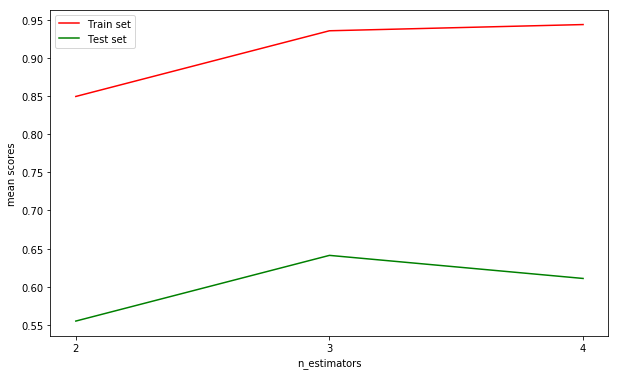

In [10]:
# plotting the graph using created function to find the variation in model for given n_estimators -- NEEDS LEGEND

grid = gridfunc(classifier,{'n_estimators': [2, 3, 4]} , X_train, y_train)
hp_cv_scores(grid)

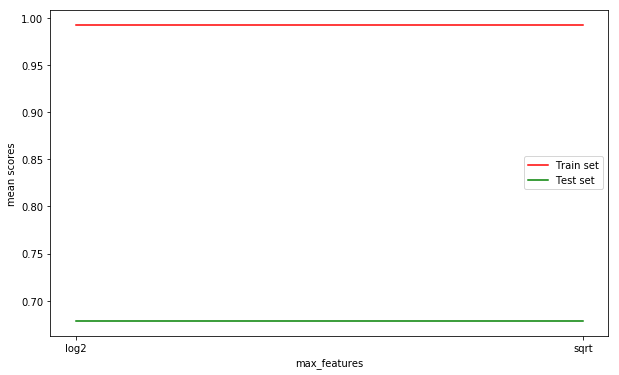

In [11]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , X_train, y_train)
hp_cv_scores(grid)

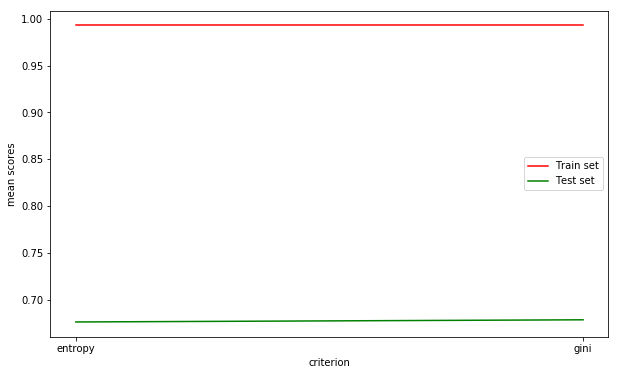

In [12]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , X_train, y_train)
hp_cv_scores(grid)

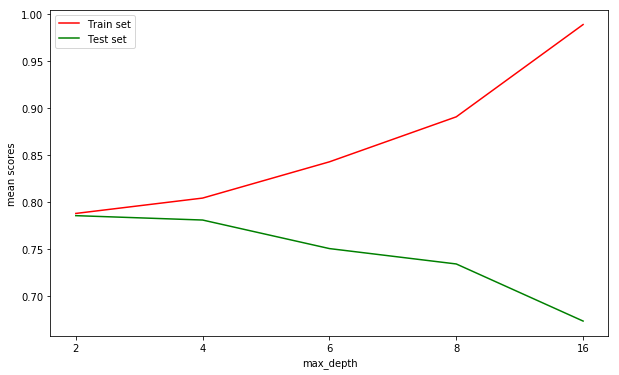

In [13]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , X_train, y_train)
hp_cv_scores(grid)

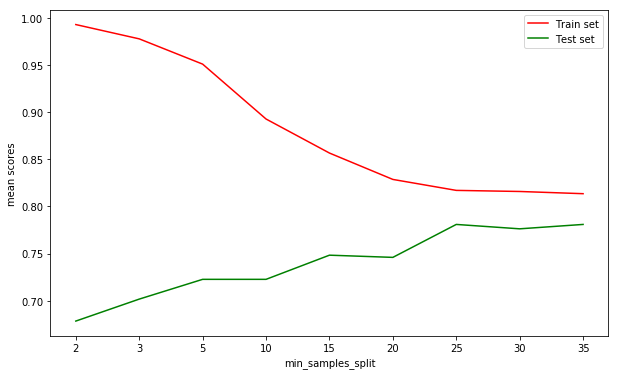

In [14]:
# plotting the graph to find the variation in model for given min samples split

grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , X_train, y_train)
hp_cv_scores(grid)

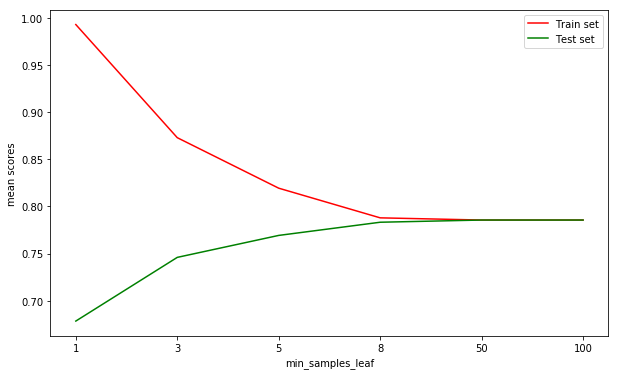

In [15]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

In [16]:
classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }

### The below code will create a Grid Object and train it. It might take a lot of time for the process to complete

In [17]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, X_train, y_train)

In [18]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=2, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

We have the best possible parameters for our model using GridSearch now!

#### Final overview

* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node it searches for the best feature among a random subset of features. 
* This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model. 

- Random Forests can be easily deployed in a distributed fashion due to the fact that they can run in parallel and for imbalanced data Random Forest stratifys the sampling.
- And it is true that they are more robust to overfitting and require less tuning to avoid it.

# Thank you 